# Evaluation of the Model

### Three Ways to Evaluate Scikit Learn Model / Estimator.

**A.Estimator Score Method**

**B.The Scoring Parameter**

**C.Problem Specific Metric Function**

## Evaluation of a Classification Model

### Classification Model Evaluation Metrics

**1.Accuracy**

**2.Confusion Matrix**

**3.Classification Report**

**4.Area Under ROC**


**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

**Import Data Set**

In [2]:
Heart = pd.read_csv('Heart Disease.csv')

Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Checking for Information and whether there is any Categorical Column**

In [3]:
print(Heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


**Splitting the Data Set into Independent Features and Dependent Feature Labels**

In [4]:
X = Heart.drop('target',axis = 'columns')

Y = Heart['target']

**Splitting the Data Set into Training and Testing Set**

In [5]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state=42)

**X_Train : The Set of Data to be Trained.**

**Y_Train : The Set of Labels (Target Variable) of the X_Train Data, This Set of Data is also Trained with X_Train.**

**X_Test : The Set of Data on which the Trained Model is to be Tested to Check the Accuracy of Model.**

**Y_Test : The Set of Data which will be Compared with the Results of Trained Model to Check Accuracy as well as other Evaluation Metrics.**

In [6]:
print(f'70% of Train Set : {X_Train.shape} and Labels of Train Set : {Y_Train.shape}')

print(f'30% of Test Set : {X_Test.shape} and Labels of Test Set : {Y_Test.shape}')

70% of Train Set : (212, 13) and Labels of Train Set : (212,)
30% of Test Set : (91, 13) and Labels of Test Set : (91,)


### According to Scikit Learn Algorithm Map

**First we will Try Linear Support Vector Classifier**

In [7]:
from sklearn.svm import LinearSVC

**Instantiate Linear Support vector Classifier Object**

In [8]:
SVC = LinearSVC()

**Fit the Data to the Classifier to Find Patterns, in short Train the Model**

In [9]:
SVC.fit(X_Train, Y_Train)

LinearSVC()

## A. Estimator Score Method

**Estimators have a Score Method provided as a Default Evaluation**

**For Classifiers it's Mean Accuracy**

**Check Mean Accuracy / Score**

In [10]:
print(f'Linear Support Vector Classifier Mean Accuracy : {SVC.score(X_Test, Y_Test)*100:.2f}%')

Linear Support Vector Classifier Mean Accuracy : 49.45%


**Prediction Made by the Linear Support Vector Classifier on X_Test Set**

In [11]:
SVC_Prediction = SVC.predict(X_Test)

### Evaluation of Linear Support Vector Classifier :

**Linear Support Vector Classifier (Classification Model) Evaluation Metrics**

**Accuracy**

In [12]:
print(f'Mean Accuracy of Model on Train Set : {SVC.score(X_Train, Y_Train)*100:.2f}%')
print()
print(f'Mean Accuracy of Model on Test Set : {SVC.score(X_Test, Y_Test)*100:.2f}%')

Mean Accuracy of Model on Train Set : 54.25%

Mean Accuracy of Model on Test Set : 49.45%


**Confusion Matrix**

In [13]:
from sklearn.metrics import confusion_matrix

print(f'{confusion_matrix(Y_Test, SVC_Prediction)}')

[[41  0]
 [46  4]]


**Visualize Confusion Matrix**

In [14]:
print(pd.crosstab(Y_Test, SVC_Prediction,
            rownames = ['Actual Labels'],
            colnames = ['Predicted Labels']))

Predicted Labels   0  1
Actual Labels          
0                 41  0
1                 46  4


**Classification Report**

In [15]:
from sklearn.metrics import classification_report

print(f'{classification_report(Y_Test, SVC_Prediction)}')

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        41
           1       1.00      0.08      0.15        50

    accuracy                           0.49        91
   macro avg       0.74      0.54      0.39        91
weighted avg       0.76      0.49      0.37        91



### Accuracy can be Improved further using other Model 

**According to the Scikit Learn Algorithm Map We will Try Random Forest Classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier

**Instantiate Random Forest Classifier Object**

In [17]:
RFC = RandomForestClassifier(n_estimators = 100)

**Fit the Data to Random Forest Classifier to Find the Patterns between X_Train and Y_train Sets**

In [18]:
RFC.fit(X_Train, Y_Train)

RandomForestClassifier()

## A. Estimator Score Method

**Mean Accuracy of Random Forest Classifier**

In [19]:
print(f'Random Forest Classifier Mean Accuracy on Train Set : {RFC.score(X_Train, Y_Train)*100:.2f}%')
print()
print(f'Random Forest Classifier Mean Accuracy on Test Set : {RFC.score(X_Test, Y_Test)*100:.2f}%')

Random Forest Classifier Mean Accuracy on Train Set : 100.00%

Random Forest Classifier Mean Accuracy on Test Set : 82.42%


**Prediction made by Random Forest Classifier on X_Test Data Set**

In [20]:
RFC_Prediction = RFC.predict(X_Test)

**Probability of Prediction**

In [21]:
RFC_Probability = RFC.predict_proba(X_Test)

In [22]:
print(np.array(RFC.predict_proba(X_Test)[:5]))

[[0.92 0.08]
 [0.34 0.66]
 [0.44 0.56]
 [0.81 0.19]
 [0.27 0.73]]


**Compare X_Test Data Set with Y_Test Labels**

In [23]:
X_Test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [24]:
print(f'{np.array(Y_Test[:5])}')

[0 0 1 0 1]


### Evaluation of Random Forest Classifier :

**Random Forest Classifier (Classification Model) Evaluation Metrics**

**1.Accuracy**

In [25]:
print(f'Random Forest Classifier Mean Accuracy on Test Data Set : {RFC.score(X_Test, Y_Test)*100:.2f}%')

Random Forest Classifier Mean Accuracy on Test Data Set : 82.42%


**2.Confusion Matrix**

**Compare the Labels that a Model Predicts and the Actual Labels it was supposed to Predict.**

**Simply its a Comparison between The Actual and Predicted Labels, i.e Y_Test with Prediction.**

In [26]:
print(f'Confusion Matrix of Random Forest Classifier :')

print()

print(f'{confusion_matrix(Y_Test, RFC_Prediction)}')

print()

print(pd.crosstab(Y_Test, RFC_Prediction,
            rownames = ['Actual Labels'],
            colnames = ['Predicted Labels']))

print()

print(f'Total : {35 + 41 + 9 + 6}')

print()

print(f'Total Labels : {len(RFC_Prediction)}')

Confusion Matrix of Random Forest Classifier :

[[33  8]
 [ 8 42]]

Predicted Labels   0   1
Actual Labels           
0                 33   8
1                  8  42

Total : 91

Total Labels : 91


<img src = 'Confusion Matrix Anatomy.png'>

**1.True Positive : Model Predicts 1 when Truth (Actual) is 1**

**2.False Positive : Model Predicts 1 when Truth (Actual) is 0**

**3.True Negative : Model Predicts 0 when Truth (Actual) is 0**

**4.False Negative : Model Predicts 0 when Truth (Actual) is 1**

<img src ='Confusion Matrix.png'>

**Heat Map of Confusion Matrix**

In [27]:
import seaborn as sns

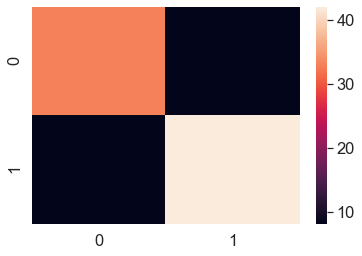

In [28]:
# Set Font Scale
sns.set(font_scale=1.5)

# Create Confusion Matrix 
Confusion_Matrix = confusion_matrix(Y_Test, RFC_Prediction)

# Plot the Heatmap
sns.heatmap(Confusion_Matrix);

**For More Intuitive Heatmap**

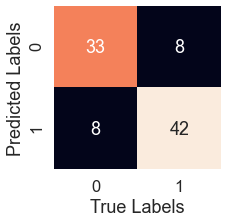

In [29]:
def Plot_Confusion_Matrix(Confusion_Matrix) :
    '''
    
    Plot Confusion Matrix using Seaborn's Heatmap
    
    Parameter
    ---------
    
    Confusion Matrix.
    
    '''
    
    Fig, Axes = plt.subplots(figsize=(3,3))
    
    Axes = sns.heatmap(Confusion_Matrix, annot=True, cbar = False)
    
    plt.xlabel('True Labels')
    
    plt.ylabel('Predicted Labels')
    
    # Fix the Brok en Annotations
    
    Bottom, Top = Axes.get_ylim()
    
    Axes.set_ylim(Bottom, Top)
    
    plt.show()
    
Plot_Confusion_Matrix(Confusion_Matrix)

**3.Classification Report**

In [30]:
print(f'Classification Report of Random Forest Classifier :')

print(f'\n{classification_report(Y_Test, RFC_Prediction)}')

print(f'\nClassification Report in form of Data Frame : ')

print(pd.DataFrame(classification_report(Y_Test, RFC_Prediction, output_dict=True)))

Classification Report of Random Forest Classifier :

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91


Classification Report in form of Data Frame : 
                   0      1  accuracy  macro avg  weighted avg
precision   0.804878   0.84  0.824176   0.822439      0.824176
recall      0.804878   0.84  0.824176   0.822439      0.824176
f1-score    0.804878   0.84  0.824176   0.822439      0.824176
support    41.000000  50.00  0.824176  91.000000     91.000000


**Precision : Positive Predicted Value**

**Recall : True Positive Rate**

**F1 Score : Combination of Precision and Recall (Average)**

**Support : Number of Samples Each Metric is Calculated on.**

**Accuracy : Accuracy of Model, Perfect Accuracy is 1.0 or 100%**

**Macro Average : Average between Classes of Labels (0 and 1), Classes must be Balanced (Almost Equal Number of 0's and 1's )**

**[Metrics and Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)**

### To Summarize Classification Metrics :

**Accuracy : A Good Measure to Start with if the Classes are Balanced (Same Amount of 0 and 1 Labels.**

**Precision and Recall becomes more Important when classes are Imbalanced.**

**If False Positive Predictions are Worse than False Negatives, Aim for High Precisions.**

**If False Negative Predictions are Worse than False positives, Aim for High Recall.**

**F1 Score is a Combination of Precision and Recall.**

**4.Area under Curve or ROC - Receiver Under Characteristic Curve (AUC/ROC)**

**AUC/ROC curves are comparison of a Model's True Positive Rate (TPR) and False Positive Rate (FPR)**

**1.True Positive : Model Predicts 1 when Truth (Actual) is 1**

**2.False Positive : Model Predicts 1 when Truth (Actual) is 0**

**3.True Negative : Model Predicts 0 when Truth (Actual) is 0**

**4.False Negative : Model Predicts 0 when Truth (Actual) is 1**

<img src ='Confusion Matrix.png'>

In [31]:
from sklearn.metrics import roc_curve

**Make Predictions with Probabilities**

In [32]:
Positive_Probability = RFC_Probability[:,1]

In [33]:
print(Positive_Probability[:10])

[0.08 0.66 0.56 0.19 0.73 0.86 0.7  0.06 0.04 0.57]


**Calculate FPR, TPR and Thresholds**

In [34]:
FPR, TPR, Thresholds = roc_curve(Y_Test, Positive_Probability) 

# Y_True : Y_Test Labels 

# Y_Score : Probability Estimates of the Positive Class i.e. (Label : 1)

**Check the False Positive Rate**

In [35]:
print(FPR[:10])

[0.         0.         0.         0.         0.         0.
 0.         0.02439024 0.02439024 0.02439024]


**Check the True Positive Rate**

In [36]:
print(TPR[:10])

[0.   0.02 0.04 0.08 0.12 0.16 0.18 0.18 0.22 0.26]


**Creating a Function to Plot ROC Curve**

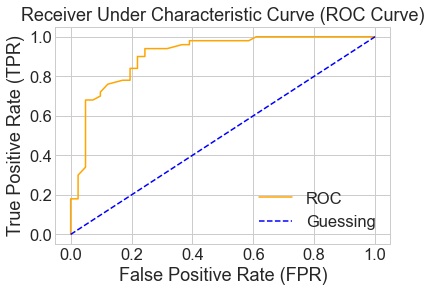

In [37]:
def Plot_ROC_Curve(FPR, TPR) :
    ''' 
    Plots Receiver Under Characteristic Curve (ROC Curve)
    
    Parameters 
    ----------
    
    FPR : False Positive Rate.
    
    TPR : True Positive Rate.
    
    '''
    
    # Theme Style
    
    plt.style.use('seaborn-whitegrid')
    
    # Plot ROC Curve
    
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    
    # Plot Line with no Predictive Powers (Base Line)
    
    plt.plot([0,1], [0,1], color = 'blue', linestyle = '--', label = 'Guessing')
    
    # Customize the Plot
    
    plt.xlabel('False Positive Rate (FPR)')
    
    plt.ylabel('True Positive Rate (TPR)')
    
    plt.title('Receiver Under Characteristic Curve (ROC Curve)')
    
    plt.legend()
    
    plt.show()
    
Plot_ROC_Curve(FPR, TPR)

**ROC AUC Score**

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
print(f'ROC AUC Score : {roc_auc_score(Y_Test, Positive_Probability)*100:.2f}%') # Max AUC Score we can get is 100%.

ROC AUC Score : 90.68%


**Plot Perfect ROC Curve**

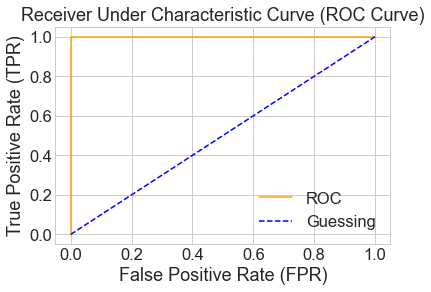

In [40]:
FPR, TPR, Thresholds = roc_curve(Y_Test, Y_Test) # Pass Both Parameters  Y_Test Labels.

Plot_ROC_Curve(FPR, TPR)

**Perfect AUC Score**

In [41]:
print(f'Perfect AUC Score : {roc_auc_score(Y_Test, Y_Test)*100:.2f}%') # Pass Both Parameters  Y_Test Labels.

Perfect AUC Score : 100.00%


**Perfect ROC Curve and AUC Score mean Perfect Model with only True Positives and No False Positives.**

### Using the Scoring Parameter

**Let's Try Evaluation of Random Forest Classifier using K Fold Cross Validation**

<img src = 'Cross Validation.png'>

**K Fold Cross Validation can help us to Find Best Estimator we can get for our Data Set**

In [42]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

CVS = cross_val_score(RFC, X, Y, cv=5)

**Model is Trained on 5 Different Versions of Training Data Set, and Evaluated on 5 Different Versions of Test Data Set**

In [43]:
print(f'Cross Validation Score : {CVS}')

Cross Validation Score : [0.81967213 0.90163934 0.83606557 0.78333333 0.78333333]


**K Fold Cross Validation Mean Score for Random Forest Classifier :**

## B.The Scoring Parameter :

**Model Evaluation Tools using Cross Value Score or Grid Search CV rely on Scoring Parameters.**

**Default Scoring Parameter = None (Accuracy)**

In [44]:
np.random.seed(42)

CVS = cross_val_score(RFC, X, Y, cv=5, scoring=None)

print(f'Cross Validation Mean Score : {np.mean(CVS)*100:.2f}% ')

Cross Validation Mean Score : 82.48% 


**Scoring Parameter = Accuracy**

In [45]:
np.random.seed(42)

CVS_Accuracy = cross_val_score(RFC,X, Y, cv = 5, scoring='accuracy')

print(f'Cross Validation Mean Score : {np.mean(CVS_Accuracy)*100:.2f}%')

Cross Validation Mean Score : 82.48%


**Scoring Parameter = Precision**

In [46]:
np.random.seed(42)

CVS_Precision = cross_val_score(RFC, X, Y, cv = 5, scoring = 'precision')

print(f'Cross Validation Mean Score : {np.mean(CVS_Precision)*100:.2f}%')

Cross Validation Mean Score : 83.30%


 **Scoring Parameter = Recall**

In [47]:
np.random.seed(42)

CVS_Recall = cross_val_score(RFC, X, Y,cv = 5, scoring = 'recall')

print(f'Cross Validation Mean Score : {np.mean(CVS_Recall)*100:.2f}%')

Cross Validation Mean Score : 85.45%


**Scoring Parameter = F1 Score**

In [48]:
np.random.seed(42)

CVS_F1 = cross_val_score(RFC, X, Y, scoring = 'f1')

print(f'Cross Validation Mean Score : {np.mean(CVS_F1)*100:.2f}%')

Cross Validation Mean Score : 84.27%


## C. Problem Specific Metric Function

**Classification Evaluation Functions**

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
print(f'Accuracy Score : {accuracy_score(Y_Test, RFC_Prediction)*100:.2f}%')

print(f'\nPrecision Score : {precision_score(Y_Test, RFC_Prediction)*100:.2f}%')

print(f'\nRecall Score : {recall_score(Y_Test, RFC_Prediction)*100:.2f}%')

print(f'\nF1 Score : {f1_score(Y_Test, RFC_Prediction)*100:.2f}%')

Accuracy Score : 82.42%

Precision Score : 84.00%

Recall Score : 84.00%

F1 Score : 84.00%
